### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

### Load the Dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
#Normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
#Reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

### Exploratory Data Analysis

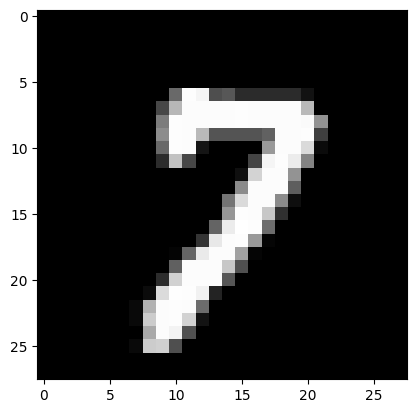

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

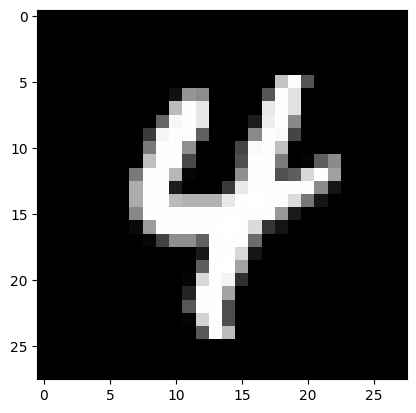

In [8]:
#randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

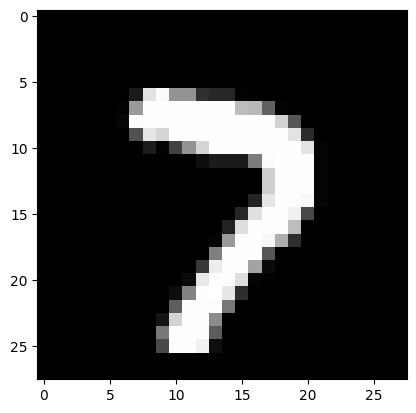

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

### Model Creation

In [17]:
model = Sequential([
    #encoder network
                    Conv2D(32, 3, activation='relu', padding='same',  input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='Same'),
                    #Decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    #Output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 16)       

In [11]:
#train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20

235/235 [==============================] - 16s 64ms/step - loss: 0.1633 - val_loss: 0.0886
Epoch 2/20
235/235 [==============================] - 15s 66ms/step - loss: 0.0843 - val_loss: 0.0797
Epoch 3/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0788 - val_loss: 0.0764
Epoch 4/20
235/235 [==============================] - 17s 72ms/step - loss: 0.0762 - val_loss: 0.0744
Epoch 5/20
235/235 [==============================] - 16s 67ms/step - loss: 0.0746 - val_loss: 0.0732
Epoch 6/20
235/235 [==============================] - 16s 68ms/step - loss: 0.0735 - val_loss: 0.0723
Epoch 7/20
235/235 [==============================] - 16s 69ms/step - loss: 0.0727 - val_loss: 0.0716
Epoch 8/20
235/235 [==============================] - 16s 67ms/step - loss: 0.0720 - val_loss: 0.0712
Epoch 9/20
235/235 [==============================] - 16s 69ms/step - loss: 0.0715 - val_loss: 0.0710
Epoch 10/20
235/235 [==============================] - 17s 71ms/step - loss: 0.07

### Visualize the Results


In [12]:
#predict the results from model(get compressed images)
pred =model.predict(x_test)

313/313 [==============================] - 5s 16ms/step


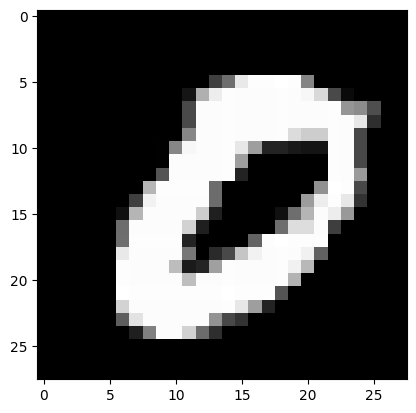

In [13]:
#Randonly select input imge
index = np.random.randint(len(x_test))
#plot the image

plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

<function matplotlib.pyplot.gray() -> 'None'>

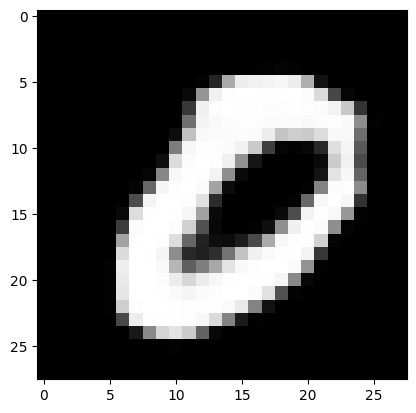

In [14]:
#Visualize compressed image
plt.imshow(pred[index].reshape(28, 28))
plt.gray

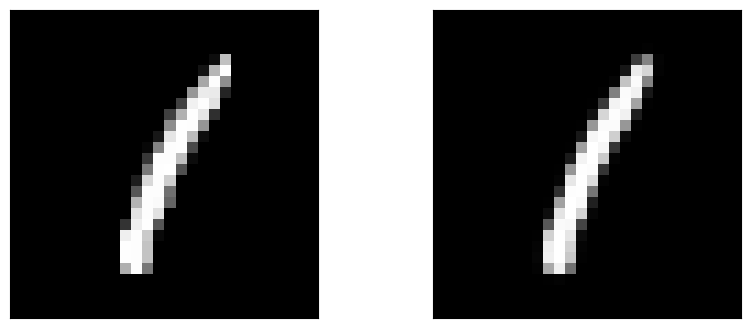

In [15]:
index= np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
#display the original image
ax= plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Display compressed image

ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

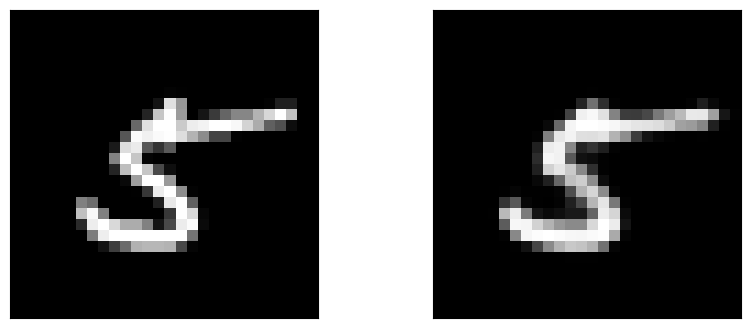

In [16]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
#display the original image
ax=plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#Display compressed image
ax= plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
